# Ensuring enough number of points
From all the colors (or unique class of event logs) 

In [1]:
from src import *
from src.models.AlmaClasses import *
palette = PaletteFileDB(
    filename='../data/processed/colors-almaAntenna.pkl', 
    colorFunction=paintedForAlmaAntennas )

colors=palette.getColors()

#db = DelaysFileDB( caseName="CaseAntennaInArray", path= '../' + config.FILEPATH_DB+"/delays") 
db = DelaysFileDB( caseName="CaseAntennaObserving", path= '../' + config.FILEPATH_DB+"/delays") 
#db = DelaysFileDB( caseName="CaseRadioSetup", path= '../' + config.FILEPATH_DB+"/delays") 

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# How many unique colors for this case?
"%s : %s colors %s" % (db.caseName, len(db.unique_colors()), db.unique_colors()[:20])

'CaseAntennaObserving : 125 colors [345, 387, 395, 397, 398, 400, 402, 439, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475]'

In [4]:
# How many individual delayes are registered for this case?
"Pairs: %s in %s different cases" % (db.total_pairs(), db.total_cases())

'Pairs: 4025 in 351 different cases'

Now let's define a *first criteria* for meaninguful pairs. The most basic one is to analyze just some sets having enough amount of information, in this case, set by the parameter *MIN_NUMBER_OF_SAMPLES*

In [5]:
MIN_NUMBER_OF_SAMPLES = 100
meaningfulPairs, discarded = {}, 0
for (a,b) in db.pair_names():
    ipp = db._instances_per_pair[(a,b)]
    dpp = db._delays_per_pair[(a,b)]
    percen = 100.0*ipp/db.total_cases()
    
    if dpp >= MIN_NUMBER_OF_SAMPLES:    
        meaningfulPairs[(a,b)] = ( percen, ipp,  dpp ) 
        
print ("Ommiting %s having less than %s samples (%s meaningful)" % ( db.total_pairs() - len(meaningfulPairs) , MIN_NUMBER_OF_SAMPLES, len(meaningfulPairs)))

for (a,b) in meaningfulPairs.keys()[:10]:
    percen, ipp,  dpp = meaningfulPairs[(a,b)][0], meaningfulPairs[(a,b)][1], meaningfulPairs[(a,b)][2]
    print ("%s\tInstances / Delays = (%.1f%%) %s / %s" % ( (a,b), percen, ipp,  dpp ) )


Ommiting 3416 having less than 100 samples (609 meaningful)
(505, 509)	Instances / Delays = (75.8%) 266 / 1195
(466, 470)	Instances / Delays = (100.0%) 351 / 351
(470, 477)	Instances / Delays = (96.0%) 337 / 337
(464, 476)	Instances / Delays = (96.0%) 337 / 337
(465, 482)	Instances / Delays = (96.0%) 337 / 337
(468, 495)	Instances / Delays = (35.9%) 126 / 126
(469, 487)	Instances / Delays = (32.8%) 115 / 115
(470, 479)	Instances / Delays = (96.0%) 337 / 337
(464, 498)	Instances / Delays = (35.9%) 126 / 126
(475, 477)	Instances / Delays = (94.0%) 330 / 330


In [6]:
#pp=(436, 440)
#colors[pp[0]] , "----------------", colors[pp[1]]

## Searching for regularitites in every pair
We already found a subset of pairs (a,b) that has at least certain amount of data to work with them. First, let's define our outlier function based on rank and sensivity

In [7]:
from pandas import Series
from matplotlib import pyplot
import numpy as np

def minmax_rank_based( values, sensitivity ):
    value_counts = Series(sorted(values)).value_counts()
    cumsum = value_counts.cumsum()
    typicalValues = cumsum[ cumsum <= sensitivity * value_counts.sum() ]
    try:
        return min(typicalValues.index), max(typicalValues.index)
    except:
        return (-1,-1)

def graph(delays, str = ""):
    fig = pyplot.figure()
    fig.suptitle(str)
    pyplot.plot(delays)
    pyplot.show()
    
def graph_hist(delays, str = ""):
    fig = pyplot.figure()
    fig.suptitle(str)
    pyplot.hist(delays)
    pyplot.show()
    
def strip(delays, perc):
    d2 = delays[:]
    d2.sort()
    L = int ( len(d2)/2.0 * (1.0 - perc/100.0) )
    return d2[ L:-L ]

---- (505, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} current u = ${N}[V]')
---- (509, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)]')


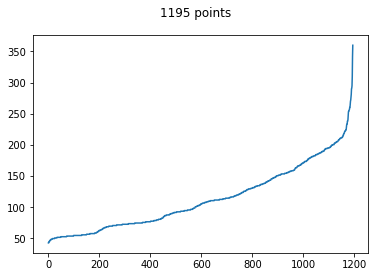

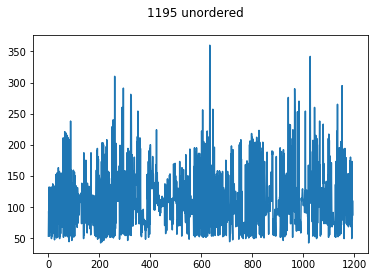

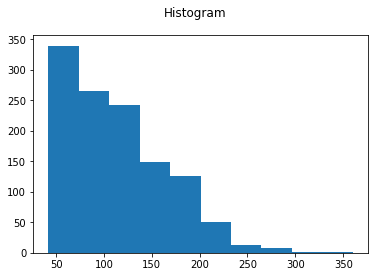

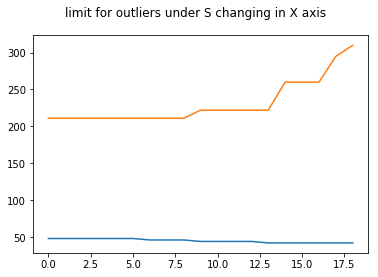

count    1195.000000
mean      113.233473
std        52.039637
min        42.000000
25%        72.000000
50%       104.000000
75%       150.000000
max       360.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (466, "[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libAntInterferometryController.so'.")
---- (470, "[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/AntInterferometryController' activated.")


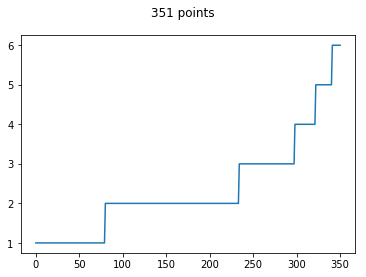

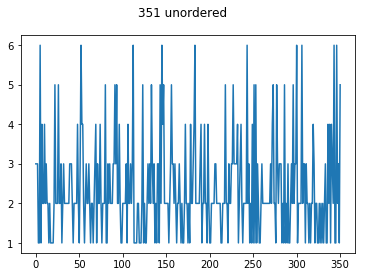

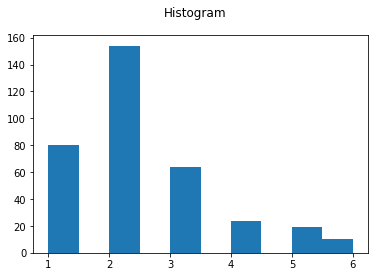

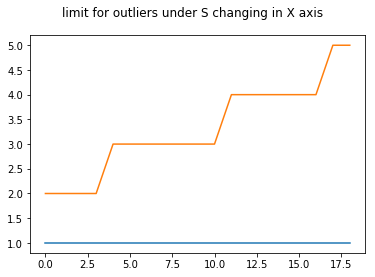

count    351.000000
mean       2.367521
std        1.223099
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (470, "[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/AntInterferometryController' activated.")
---- (477, '[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED')


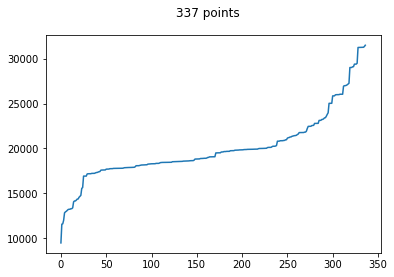

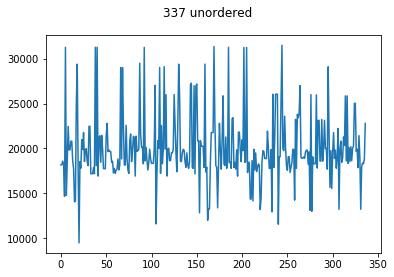

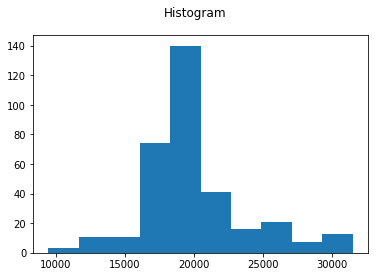

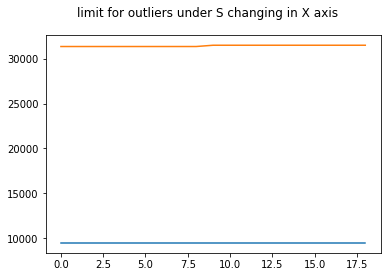

count      337.000000
mean     20002.255193
std       3754.700422
min       9462.000000
25%      18076.000000
50%      19075.000000
75%      21220.000000
max      31517.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (464, "[maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.")
---- (476, '[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING')


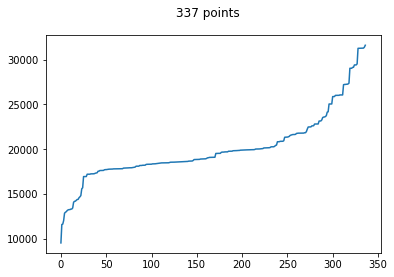

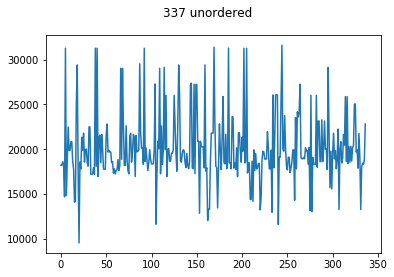

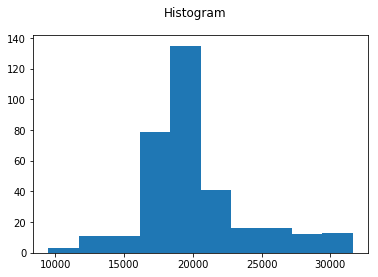

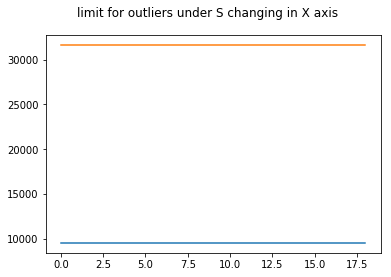

count      337.000000
mean     20054.928783
std       3766.993871
min       9507.000000
25%      18094.000000
50%      19091.000000
75%      21427.000000
max      31629.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (465, "[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libAntInterferometryController.so'")
---- (482, '[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)')


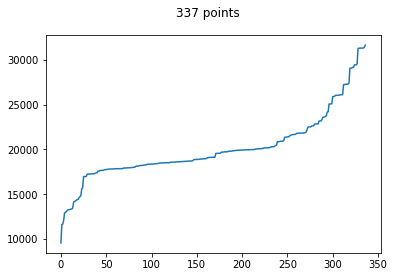

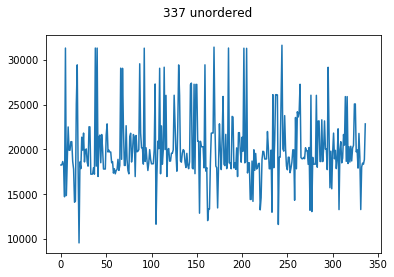

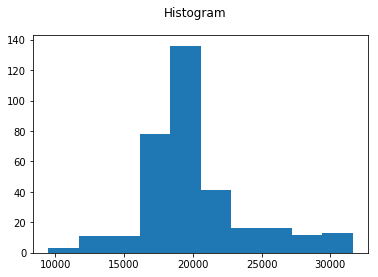

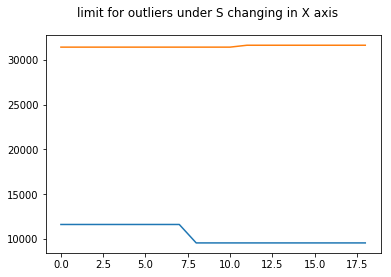

count      337.000000
mean     20065.032641
std       3767.556913
min       9512.000000
25%      18102.000000
50%      19104.000000
75%      21431.000000
max      31634.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (468, '[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZING -> INITIALIZED')
---- (495, '[CONTROL/${ANT}/FrontEnd/WCA${N} - maximizeIFTP] (initial) coarse tune: : ${N} Initial IFTP: ${N}')


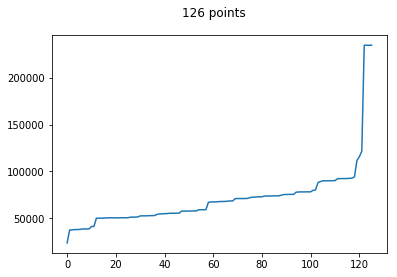

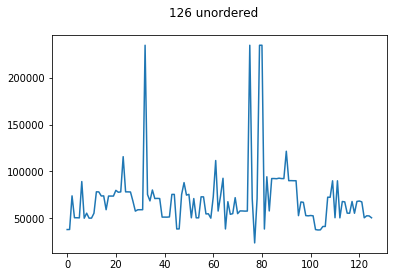

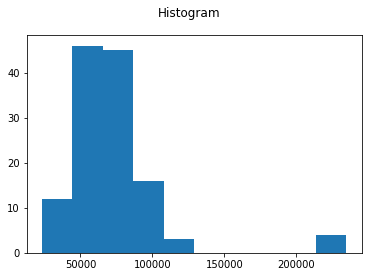

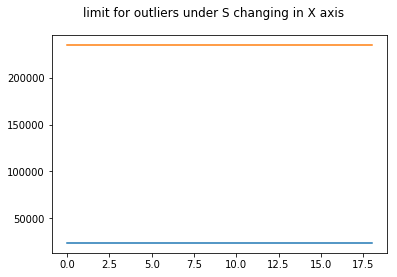

count       126.000000
mean      70761.198413
std       34574.731835
min       23297.000000
25%       52279.750000
50%       67517.500000
75%       76961.750000
max      234828.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (469, '[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZED -> OPERATIONAL')
---- (487, '[CONTROL/${ANT}/LOtwoBBpr_B - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is below the first LO. No LO offsetting will be used Retuning as this is diferent from the current state at this time')


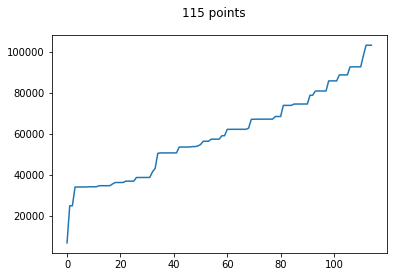

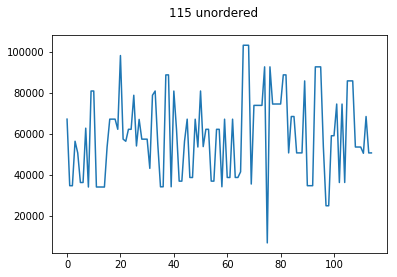

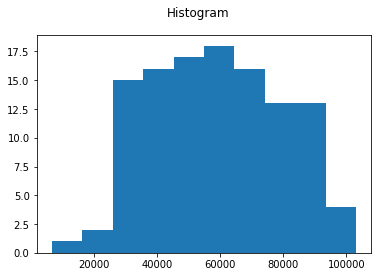

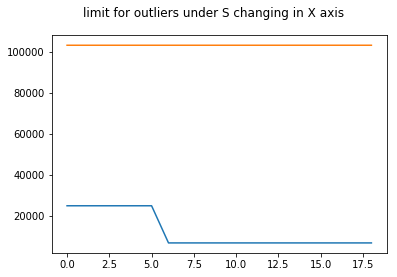

count       115.000000
mean      59280.530435
std       20513.156884
min        6643.000000
25%       38568.500000
50%       57274.000000
75%       74391.500000
max      103083.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (470, "[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/AntInterferometryController' activated.")
---- (479, "[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/TOTALPOWER' activated.")


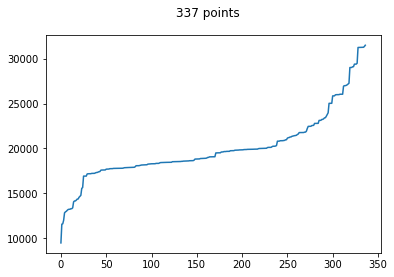

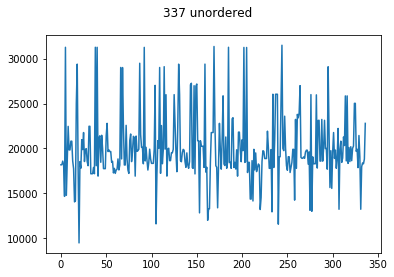

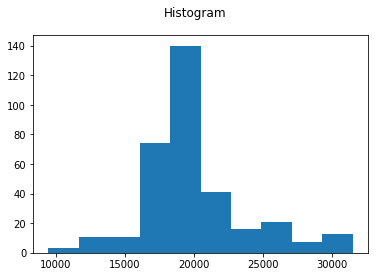

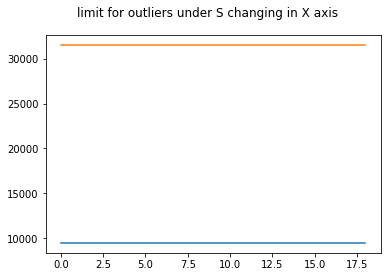

count      337.000000
mean     20003.097923
std       3754.561267
min       9463.000000
25%      18076.000000
50%      19076.000000
75%      21220.000000
max      31517.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (464, "[maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.")
---- (498, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Done Offsetting Floog')


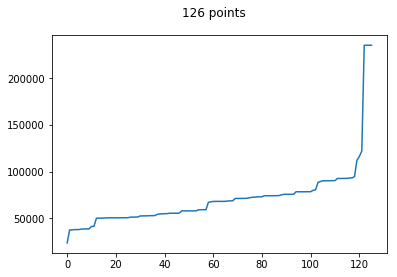

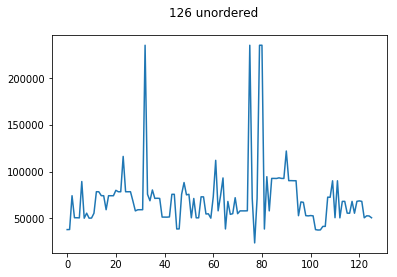

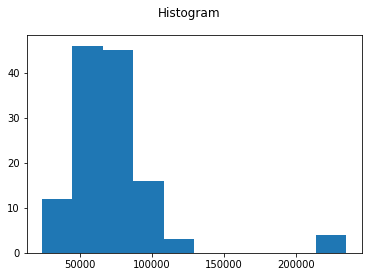

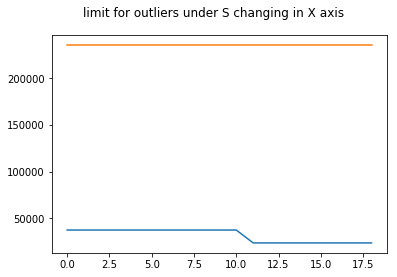

count       126.000000
mean      71217.261905
std       34592.876351
min       23666.000000
25%       52598.750000
50%       68112.000000
75%       77731.750000
max      235197.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (475, "[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libTotalPowerImpl.so'.")
---- (477, '[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED')


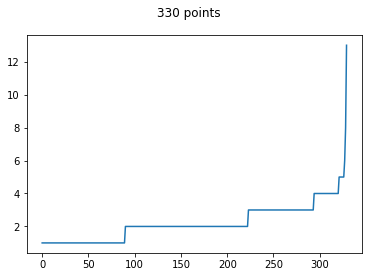

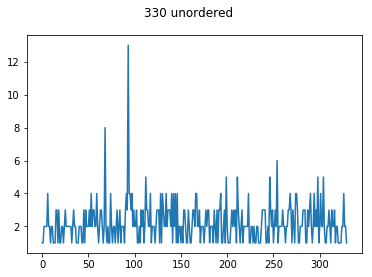

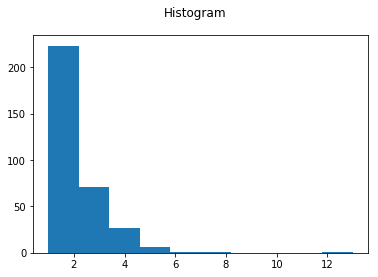

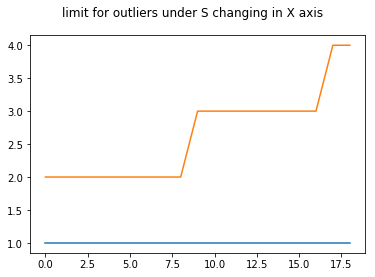

count    330.000000
mean       2.224242
std        1.207129
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------


In [8]:
pairs = meaningfulPairs.keys()
for i in range(10):
    (a,b) = pairs[0 + i]
#     (a,b) = pairs[50 + i]
    # a= 510; b = 511
    delays = db.getDelays(a,b)

    delays.sort()
    changingSensitivity=[ minmax_rank_based( db.getDelays(a,b), 0.8 + S/100.0 ) for S in range(1, 20) ]

    print "----", (a, colors[a])
    print "----", (b, colors[b])

    graph( delays, "%s points" % ( len(delays) ) )
    graph( db.getDelays(a,b), "%s unordered" % ( len(delays) ) )
    graph_hist( delays, "Histogram" )
    graph(changingSensitivity, "limit for outliers under S changing in X axis")
    
    print Series(delays).describe()
    
    print "---------------------------------- NEXT GRAPH ----------------------------------"
    
    #graph( [ minmax_rank_based( delays, 0.5 + S/100.0 ) for S in range(1, 50) ], "same, but sorted" )
#     graph( strip(delays, 80), "(80 %%) %s points" % ( len(strip(delays, 80)) ) )
#     graph( [ minmax_rank_based( strip(delays, 80), 0.8 + S/100.0 ) for S in range(1, 20) ], "same, but 80% stripped" )